## kaggle Titanic-Machine Learning from Disaster のデータを用いた、機械学習モデル間の予測精度の観察

### J2200036 小野　慧

このレポートでは、kaggleよりTitanic-Machine Learning from Disasterのデータを用いて、複数のモデルにおける予測精度を観察する。

元データ https://www.kaggle.com/competitions/titanic/data#

データにはtrain.csvとtest.csvがあり、titanic号の乗船者に関する情報が含まれている。欠損値を含みtrain.csvには891のデータがあり、test.csvには418のデータがある。
test.csvはtrain.csvとはデータの内容が少し異なり、乗客の生死に関するデータがない。ゆえに、train.csvを教師データとして乗客の生死を学習し、test.csvにおける生死を予測する。

### 1.データを観察する

#### 1.1データそのものを観察
まずはデータがどのようなものか、欠損値はどれほどあるのかを観察する。

In [62]:
#ライブラリやファイルなどをダウンロード

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  

train = pd.read_csv("kaggle-titanic/train.csv")
test = pd.read_csv("kaggle-titanic/test.csv")

In [26]:
#データを見る
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [20]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [46]:
#欠損値の確認
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [21]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### 1.2可視化して観察する
次はmatplotlibやseabornを用いて、各特徴量や生死について観察する。

Text(0.5, 1.0, 'Age and Survived')

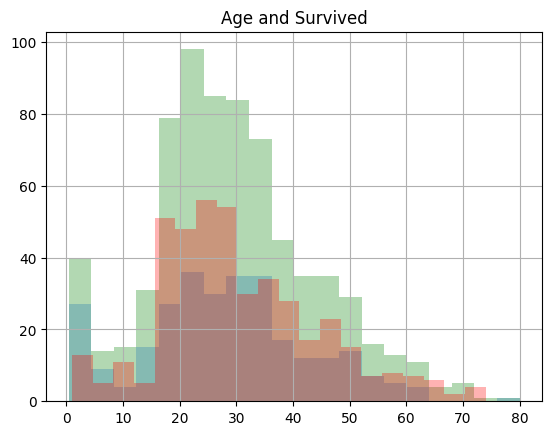

In [100]:
#Ageについて調べる

train['Age'].hist(bins = 20, alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['Age'].hist(bins = 20, alpha = 0.3)
train[train['Survived'] == 0]['Age'].hist(bins = 20, alpha = 0.3, color = 'red')

plt.title('Age and Survived')

年齢と生死についてのヒストグラムを作成した。（緑は乗客全体、赤は死亡者、青は生存者）

このヒストグラムより、各年代ごとの生存率は、20代よりも幼い人々が高いように思える。

Text(0.5, 1.0, 'Sex and Survived')

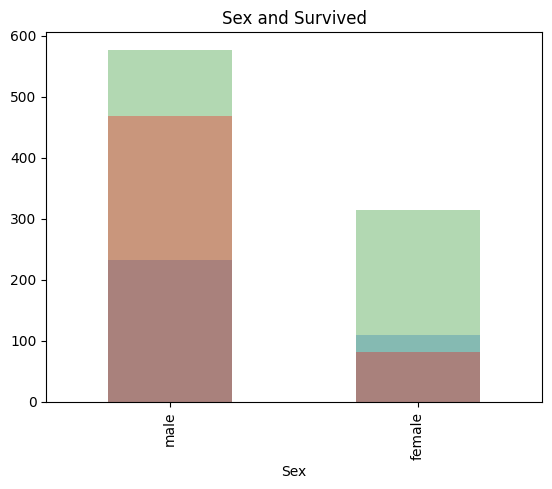

In [101]:
#Sexについて調べる

train['Sex'].value_counts().plot.bar(alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['Sex'].value_counts().plot.bar(alpha = 0.3)
train[train['Survived'] == 0]['Sex'].value_counts().plot.bar(alpha = 0.3, color = 'red')

plt.title('Sex and Survived')

性別においては、女性の生存数と生存率が高いことが明らかである。

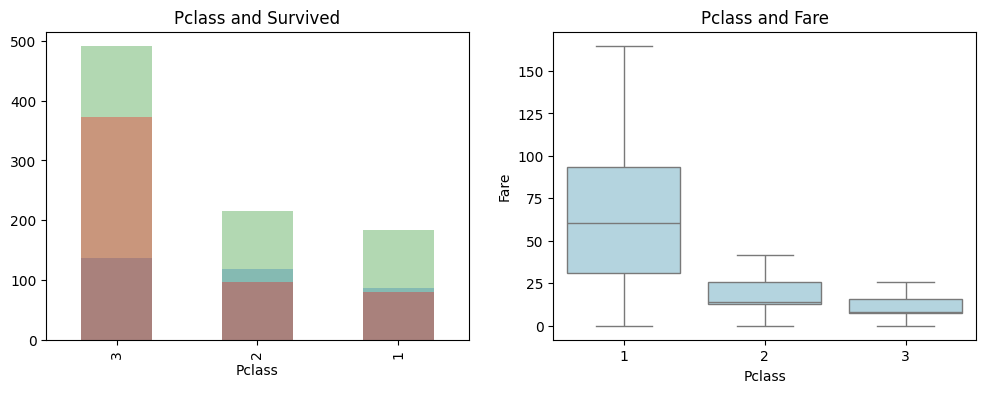

In [98]:
#Pclassと生死の関係

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
train['Pclass'].value_counts().plot.bar(alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['Pclass'].value_counts().plot.bar(alpha = 0.3)
train[train['Survived'] == 0]['Pclass'].value_counts().plot.bar(alpha = 0.3, color = 'red')
plt.title('Pclass and Survived')

#PclassとFareの関係
plt.subplot(1, 2, 2)
box_plot = sns.boxplot(x = 'Pclass', y = 'Fare', data = train, showfliers = False, color = 'lightblue')
#showfliers=Falseにて外れ値を除外

for median in box_plot.artists:
    medianline = median.get_lines()[4]
    medianline.set_color('red')
    medianline.set_linewidth(4)

plt.title('Pclass and Fare')
plt.show()

Pclassについては、Pclassの1と2については生存者と死亡者の間に大きな差はみられない。しかし、Pclassの3については死亡者が圧倒的に多いことがわかる。またPclassの2,3は50以下の低い料金で乗船した人が多いことがわかる。

Text(0.5, 1.0, 'Parch and Survived')

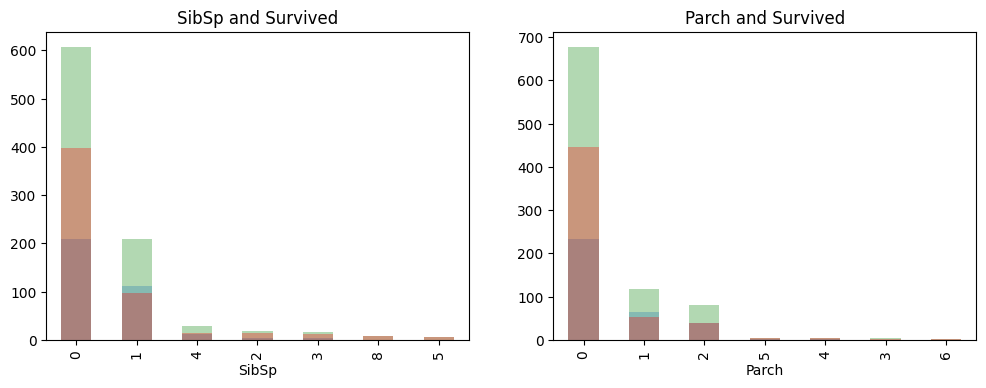

In [103]:
#SibSp(乗船者の配偶者)とParch(乗船者の子供)について調べる

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
train['SibSp'].value_counts().plot.bar(alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['SibSp'].value_counts().plot.bar(alpha = 0.3)
train[train['Survived'] == 0]['SibSp'].value_counts().plot.bar(alpha = 0.3, color = 'red')
plt.title('SibSp and Survived')

plt.subplot(1, 2, 2)
train['Parch'].value_counts().plot.bar(alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['Parch'].value_counts().plot.bar(alpha = 0.3)
train[train['Survived'] == 0]['Parch'].value_counts().plot.bar(alpha = 0.3, color = 'red')
plt.title('Parch and Survived')

SibSpとParchに関しては、どちらも配偶者と子供がいない人が多く、死亡者も多いということが分かった。

Text(0.5, 1.0, 'Fare and Survived')

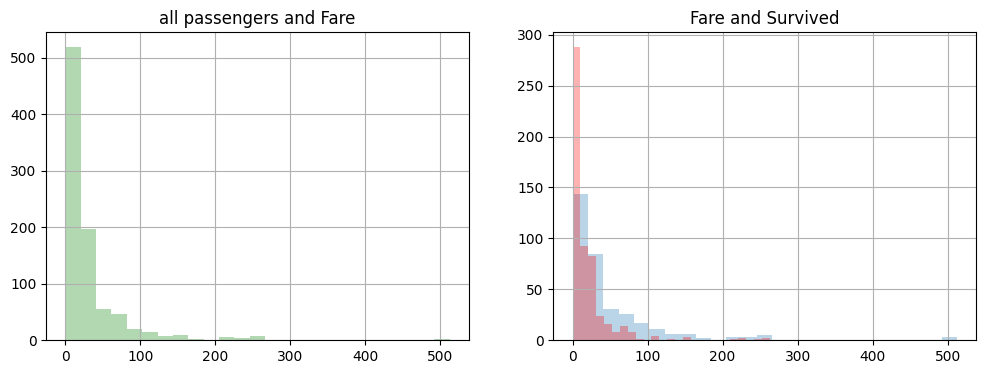

In [105]:
#Fareについて調べる

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
ax = train['Fare'].hist(bins = 25, alpha = 0.3, color = 'green')
ax.set_title('all passengers and Fare')

plt.subplot(1, 2, 2)
train[train['Survived'] == 1]['Fare'].hist(bins = 25, alpha = 0.3)
train[train['Survived'] == 0]['Fare'].hist(bins = 25, alpha = 0.3, color = 'red')
plt.title('Fare and Survived')

Fareに関しては、安い料金で乗船した人が圧倒的に多いが、そのうちの多くの人が亡くなっている。逆に、高い料金を払っている人のほうが生存している。

In [77]:
#Cabinについて
train['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
F2             3
C22 C26        3
              ..
C106           1
A19            1
D7             1
C118           1
E50            1
Name: count, Length: 147, dtype: int64

In [75]:
train[train['Survived'] == 1]['Cabin'].value_counts()

Cabin
B96 B98    4
E101       3
F33        3
D          2
D36        2
          ..
C7         1
C54        1
E36        1
C65        1
C103       1
Name: count, Length: 101, dtype: int64

In [76]:
train[train['Survived'] == 0]['Cabin'].value_counts()

Cabin
C23 C25 C27    2
F G73          2
D26            2
C124           2
C22 C26        2
              ..
B82 B84        1
A36            1
B102           1
A24            1
B51 B53 B55    1
Name: count, Length: 62, dtype: int64

Cabinについては、欠損値が半分以上を占め、グラフとして可視化するのには不適である。さらに値も予測には向かないため、データフレームの成型時に排除する。

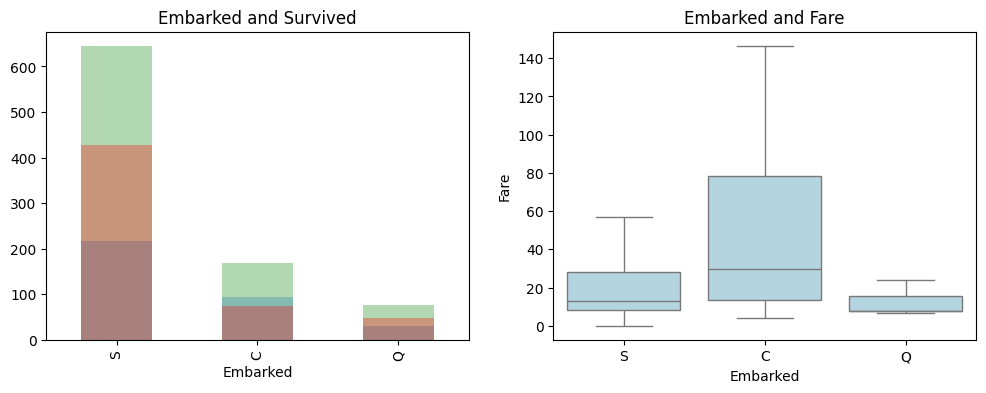

In [106]:
#Embarked(乗船港)について調べる

plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
train['Embarked'].value_counts().plot.bar(alpha = 0.3, color = 'green')
train[train['Survived'] == 1]['Embarked'].value_counts().plot.bar(alpha = 0.3)
train[train['Survived'] == 0]['Embarked'].value_counts().plot.bar(alpha = 0.3, color = 'red')
plt.title('Embarked and Survived')

plt.subplot(1, 2, 2)
box_plot = sns.boxplot(x = 'Embarked', y = 'Fare', data = train, showfliers = False, color = 'lightblue')
#showfliers=Falseにて外れ値を除外

for median in box_plot.artists:
    medianline = median.get_lines()[4]
    medianline.set_color('red')
    medianline.set_linewidth(4)

plt.title('Embarked and Fare')
plt.show()

Embarkedについては、Sから乗船した人が一番多い。S,Qともに死亡者は半分以上を占めており、中央値や四分位範囲を参考にすると、乗船時の料金はCと比較すると低い人が多い。

### 2.データを加工

先ほどの可視化した結果より、有用に思える変数はSurvived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarkedの7つと判断した。ゆえに、次は可視化した結果などから必要な特徴量を抽出・欠損値の排除・ラベルエンコーディングを行う。

In [233]:
#必要なデータを抽出
en_train = train.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])
en_test = test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'])

#Sexの欠損値を平均値で補完
age = pd.concat([en_train['Age'], en_test['Age']])
en_train['Age'].fillna(age.mean(), inplace = True)
en_test['Age'].fillna(age.mean(), inplace = True)

#Fareの欠損値を平均値で補完
fare = pd.concat([en_train['Fare'], en_test['Fare']])
en_train['Fare'].fillna(fare.mean(), inplace = True)
en_test['Fare'].fillna(fare.mean(), inplace = True)

#Embarkedの欠損値を、最も多かったSで補完
en_train['Embarked'].fillna('S', inplace = True)
en_test['Embarked'].fillna('S', inplace = True)

#カテゴリカルデータの変換
en_train.replace({'Sex': {'male': 0, 'female': 1}}, inplace = True)
en_test.replace({'Sex': {'male': 0, 'female': 1}}, inplace = True)

embarked = pd.concat([en_train['Embarked'], en_test['Embarked']])

embarked_ohe = pd.get_dummies(embarked, dtype = int)
embarked_ohe_train = embarked_ohe[:891]
embarked_ohe_test = embarked_ohe[891:]

en_train = pd.concat([en_train, embarked_ohe_train], axis=1)
en_test = pd.concat([en_test, embarked_ohe_test], axis=1)

en_train.drop('Embarked', axis=1, inplace=True)
en_test.drop('Embarked', axis=1, inplace=True)

In [65]:
#trainデータの加工の結果
en_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,1,38.0,1,0,71.2833,1,0,0
2,1,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,0,35.0,0,0,8.0500,0,0,1


In [66]:
#testデータの加工の結果
en_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,34.5,0,0,7.8292,0,1,0
1,3,1,47.0,1,0,7.0000,0,0,1
2,2,0,62.0,0,0,9.6875,0,1,0
3,3,0,27.0,0,0,8.6625,0,0,1
4,3,1,22.0,1,1,12.2875,0,0,1


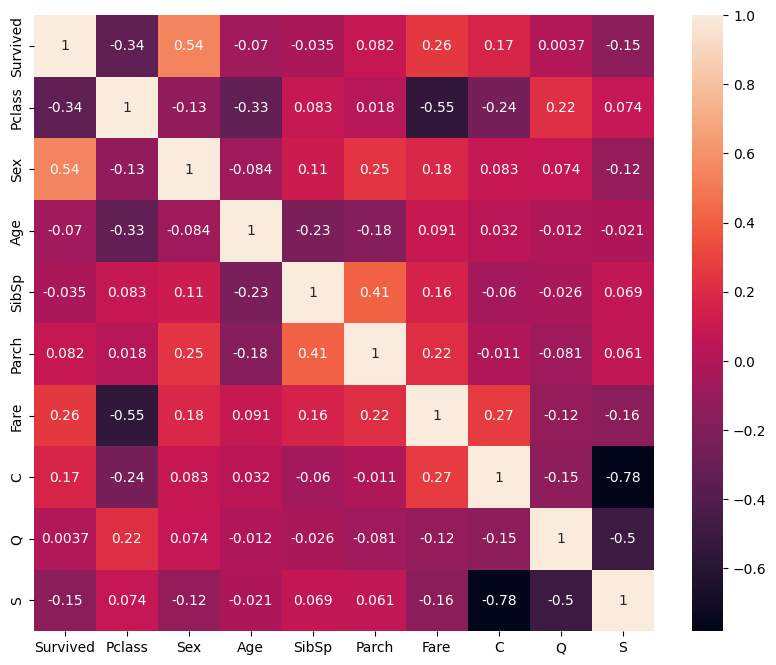

In [138]:
#全説明変数間の相関関係を調べる

fig, axs = plt.subplots(figsize = (10, 8))
sns.heatmap(en_train.corr(),annot = True)
plt.show()

この図からわかる主な相関関係は以下の通りとなる。

やや正の相関がある

Sex-Suvived,Parch-Sex,Parch-SibSp,Fare-Survived,Fare-Parch

やや負の相関がある

Pclass-Survived,Age-Pclass,SibSp-Age,Fare-Pclass

上記の相関関係には約0.2~0.5の幅があるが、学習における説明変数の候補として使えそうである。

In [237]:
#加工後のデータを確認
print(train.isnull().sum())

train.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [235]:
print(test.isnull().sum())

test.info()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 3.モデルの作成と予測

データから欠損値や不要な説明変数を削除したため、次はモデルを作成し、予測精度を比較していく。今回はtitanic号の乗客の生死についての予測なのでニクラス分類である。

#### 3.1ランダムフォレストによる予測
まずは、ランダムフォレストを用いて、予測をしていく。

In [70]:
#使いたい学習モデルをインポート
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [264]:
#データを説明変数と目的変数に分ける
X = en_train.iloc[:, 2:].values
y = en_train.iloc[:, 1].values

X_test = en_test.iloc[:, 1:].values

In [265]:
#ホールドアウト法によってデータの分割
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 42)

これで学習のためのデータができたので、以下ではクロスバリデーションを用いて学習する。

In [240]:
#クロスバリデーション1回目
param_grid = {'max_depth': [3, 4, 5], 'min_samples_leaf': [3, 4, 5]}

rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 37), param_grid, cv = 9)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 5}
CV Score: 0.891


In [241]:
#クロスバリデーション2回目
param_grid = {'max_depth': [3, 5, 7], 'min_samples_leaf': [3, 4, 5]}

rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 37), param_grid, cv = 9)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 3}
CV Score: 0.895


In [242]:
#クロスバリデーション3回目
param_grid = {'max_depth': [6, 7, 8], 'min_samples_leaf': [3, 4, 5]}

rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 37), param_grid, cv = 9)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 3}
CV Score: 0.9


In [243]:
#クロスバリデーション4回目
param_grid = {'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3, 4]}

rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 37), param_grid, cv = 9)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 2}
CV Score: 0.901


In [244]:
#クロスバリデーション5回目
param_grid = {'max_depth': [7, 8, 9], 'min_samples_leaf': [1, 2, 3]}

rfc_gs = GridSearchCV(RandomForestClassifier(n_estimators = 100, n_jobs = -1, random_state = 37), param_grid, cv = 9)
rfc_gs.fit(X, y)

print('Best Parameters: {}'.format(rfc_gs.best_params_))
print('CV Score: {}'.format(round(rfc_gs.best_score_, 3)))

Best Parameters: {'max_depth': 8, 'min_samples_leaf': 1}
CV Score: 0.916


ランダムフォレストにおけるクロスバリデーションの結果は、max_depth(決定木の深さの最大値)が8, min_samples_leaf(葉が含むサンプル数の最小値)が1という結果になった。

#### 3.2その他のモデルでの予測
次はランダムフォレスト以外のモデルにて学習・予測する。

In [266]:
#XGBoostのためにデータを修正(Pclassが1から始まるラベルのためエラーが起きる)
y_train_new = y_train - 1
y_valid_new = y_valid - 1

#XGBoost
train_d = xgb.DMatrix(X_train, label = y_train_new)
test_d = xgb.DMatrix(X_valid, label = y_valid_new)

#一意のラベルの数を確認
unique_labels_train = np.unique(y_train)
unique_labels_valid = np.unique(y_valid)

#print("Unique labels in training data: ", unique_labels_train) out [1 2 3]
#print("Unique labels in validation data: ", unique_labels_valid) out [1 2 3]

#パラメータの設定
num_class_value = len(unique_labels_train)
para = {'eta': 0.3, 'max_depth': 5, 'subsample': 0.9, 'colsample_bytree': 0.5, 'objective':'multi:softprob', 'num_class': 3}
steps = 20

#学習
bst = xgb.train(para, train_d, steps)

#予測
bst_gs = bst.predict(test_d)

#精度
best_preds = np.asarray([np.argmax(line) for line in bst_gs])
best_preds = best_preds + 1
print("Score：", round(accuracy_score(y_valid, best_preds), 4))

Score： 0.9403


XGBoostにおいてもpara(パラメータ)を動かして精度を比較してみたが、学習が進展しなくなったので、上記のスコアにて学習を止めた。

In [246]:
#ロジスティック回帰
lr = LogisticRegression(random_state = 50, max_iter = 800)
lr.fit(X_train, y_train)
a = round(lr.score(X_train, y_train), 3)
b = round(lr.score(X_valid, y_valid), 3)
d = round(a - b, 3)

print('Train Score: {}'.format(round(lr.score(X_train, y_train), 3)))
print('Test Score: {}'.format(round(lr.score(X_valid, y_valid), 3)))
print('Test - Train: ', d)

Train Score: 0.817
Test Score: 0.836
Test - Train:  -0.019


ロジスティック回帰においては上記の結果となった。精度の向上のためには特徴量エンジニアリングなどの技術が必要となるため、今の私には精度の向上が見込めないため、ここで学習を止めた。

In [247]:
#多層パーセプトロン
mlpc = MLPClassifier(hidden_layer_sizes=(100, 100, 10), random_state=0)
mlpc.fit(X_train, y_train)
a = round(mlpc.score(X_train, y_train), 3)
b = round(mlpc.score(X_valid, y_valid), 3)
d = round(a - b, 3)

print('Train Score: {}'.format(round(mlpc.score(X_train, y_train), 3)))
print(' Test Score: {}'.format(round(mlpc.score(X_valid, y_valid), 3)))
print('Test - Train: ', d)

Train Score: 0.892
 Test Score: 0.866
Test - Train:  0.026


多層パーセプトロンにおいても同様の理由で、ここで学習を止めた。

### 4.まとめ
今回のレポートでは、予測精度の高い順にXGBoost、ランダムフォレスト、多層パーセプトロン、ロジスティック回帰と4つのモデルが並んだ。XGBoostとランダムフォレストにおいては、パラメータを調整できたため予測精度を向上させることができた。しかし、多層パーセプトロンとロジスティック回帰においては、パラメータの調整も十分に行えず、他の手法をとる必要があったため、現在の私では予測精度の向上をあきらめることになってしまった。次挑戦する機会があれば、多層パーセプトロンとロジスティック回帰においてもモデルの改善を行い、より高い精度で予測できるようにしたい。